<a href="https://colab.research.google.com/github/fedat/Machine-learning/blob/main/P1_T4_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EJERCICIO USO DE LOAD BOSTON
---
##1.Importar las librerías necesarias

In [3]:
import numpy as np #Mejora el soporte para vectores y matrices
import pandas as pd #Estructura de datos (Ciencia de datos)
import matplotlib.pyplot as plt #Para graficar
import seaborn as sns #interfaz mejorada para dibujar gráficos estadísticos (basada en matplotlib)


##2. Cargar los datos de la biblioteca sckit-learn

In [4]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

##3. y 4. Conocer las características de los datos

In [ ]:
print(boston_dataset.keys())
boston_dataset.DESCR

##5.Crear la tabla usando pandas

In [ ]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head() #imprimimos las primeras 5 filas


In [ ]:
#Agregamos en la tabla los valores de target del dataset
boston['MEDV'] = boston_dataset.target
boston.head(10) 

##6.Graficando los datos del dataset (matriz de correlación de características)


In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) #tamaño del grafico
sns.distplot(boston['MEDV']) #agregamos los datos
plt.show() 

In [ ]:
#función de correlación de pandas (cercano a 1 es la mejor correlación, negativos la peor)
correlation_matrix = boston.corr().round(2)
# annot = True (para imprimir los valores dentro del cuadrado)
sns.heatmap(data=correlation_matrix, annot=True)

##6.1 Graficando variables descartadas

In [ ]:
sns.set(style='whitegrid', context='notebook')
features_plot = boston_dataset.feature_names
sns.pairplot(boston[features_plot], height=2.0);
plt.tight_layout()
plt.show()

##6.2 Descartando variables(¿por qué razón?

In [ ]:
X = boston['RAD']
y = boston['TAX']
plt.scatter(X, y)
plt.xlabel('RAD-Número de habitaciones')
plt.ylabel('TAX-valor predial de la propiedad')
plt.show()

##6.3 Gradicando variables seleccionadas

In [ ]:
X = boston['MEDV']
y = boston['RM']
plt.scatter(X,y, s=15, alpha=0.5)
plt.xlabel('MEDV-valor medio de vivienda')
plt.ylabel('RM- # de habitacions x vivienda')
plt.show()

#7. Preparación de la data


In [20]:
#entrenando con dos variables en X
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

#8. Dividir los datos en conjuntos de entrenamiento (80%) y pruebas (20%)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print("x80%: "+str(X_train.shape) +", x20%: "+str(X_test.shape))
print("y80%: "+str(Y_train.shape) +", y20%: "+str(Y_test.shape))

x80%: (404, 2), x20%: (102, 2)
y80%: (404,), y20%: (102,)


#9. Entrenando un modelo de regresión lineal

In [22]:
##y=xm+b
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#10. Evaluación del modelo

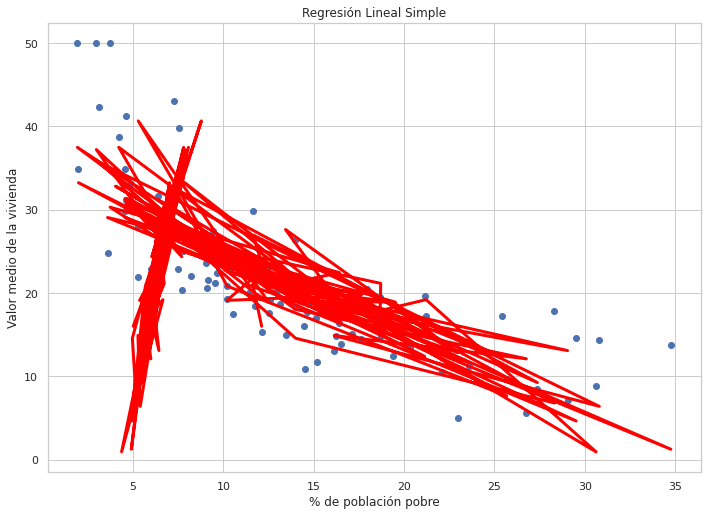


 PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE
0.6395970612990287


In [23]:
Y_pred = lin_model.predict(X_test)
plt.scatter(X_test['LSTAT'], Y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
#plt.xlabel('Número de habitaciones')
plt.xlabel('% de población pobre')
plt.ylabel('Valor medio de la vivienda')
plt.show()
print('\n PRESICIÓN DEL MODELO REGRESIÓN LINEAL SIMPLE')
print(lin_model.score(X_train, Y_train))